In [41]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df= pd.read_excel('zomato.xlsx')
df_c= pd.read_excel('Country-Code.xlsx')

In [42]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [43]:
df_c.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

### Both df can be combined through Country Code

In [44]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(9551, 21)

In [45]:
df_c= df_c.drop_duplicates() # Removing duplicate entries
df_c.shape

(15, 2)

# EDA

## 1. Null/ NaN

In [46]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [47]:
df["Cuisines"].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [48]:
df["Cuisines"] = df["Cuisines"].fillna(df["Cuisines"].mode()[0])

In [49]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### NAN values observed in "Cuisines" and has been fixed with Mode as it is categorical data

In [50]:
df_c.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [51]:
df2 = pd.merge(df,df_c,on='Country Code',how='left')
df2.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  
1    Dark Green    Excellent   591  Phillipines  

[2 rows x 22 columns]

In [52]:
df2.shape

(9551, 22)

<Axes: >

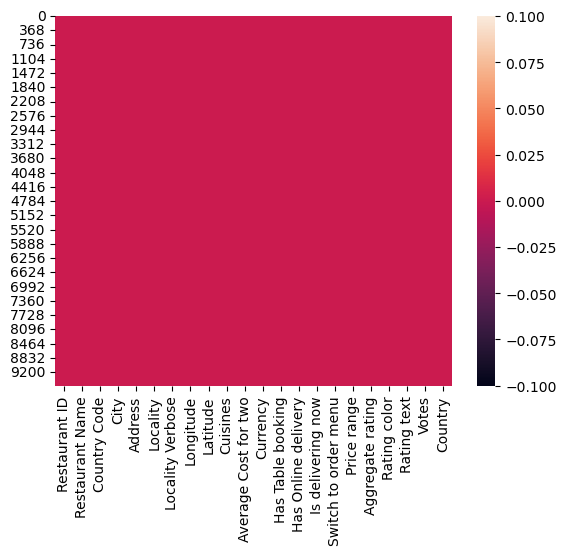

In [53]:
sns.heatmap(df2.isnull())

In [54]:
df2.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

# 2. Label Encoder, Outliars and Skewness

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [56]:
df2.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK [Except for Lat and Long]
- Median (50%) > Mean - "Price range" --> Left Skewed
- Median (50%) < Mean - "Votes","Average Cost for 2","Country Code","Rest ID" -> Right Skewed
- Standard Dev for "Average Cost for 2" -> Outliars are present
- Percentile 75% and max : "Average Cost for 2", "Votes" - outliars are present

In [57]:
# Seprating the Numerical and Categorial data columns¶

categorical_col =[]
for i in df2.dtypes.index:
    if df2.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df2.dtypes.index:
    if df2.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


Numerical Columns:  ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']




In [58]:
df2.nunique().to_frame("No of unique values")

No of unique values
Restaurant ID                        9551
Restaurant Name                      7446
Country Code                           15
City                                  141
Address                              8918
Locality                             1208
Locality Verbose                     1265
Longitude                            8120
Latitude                             8677
Cuisines                             1825
Average Cost for two                  140
Currency                               12
Has Table booking                       2
Has Online delivery                     2
Is delivering now                       2
Switch to order menu                    1
Price range                             4
Aggregate rating                       33
Rating color                            6
Rating text                             6
Votes                                1012
Country                                15

In [59]:
df2.shape

(9551, 22)

In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical columns
df2['Has Table booking'] = label_encoder.fit_transform(df2['Has Table booking'])
df2['Has Online delivery'] = label_encoder.fit_transform(df2['Has Online delivery'])
df2['Is delivering now'] = label_encoder.fit_transform(df2['Is delivering now'])
df2['Switch to order menu'] = label_encoder.fit_transform(df2['Switch to order menu'])
df2['Cuisines'] = label_encoder.fit_transform(df2['Cuisines'])
df2['City'] = label_encoder.fit_transform(df2['City'])
df2['Rating text'] = label_encoder.fit_transform(df2['Rating text'])
df2['Rating color'] = label_encoder.fit_transform(df2['Rating color'])
df2['Locality'] = label_encoder.fit_transform(df2['Locality'])
df2['Locality Verbose'] = label_encoder.fit_transform(df2['Locality Verbose'])
df2['Price range'] = label_encoder.fit_transform(df2['Price range'])
df2['Address'] = label_encoder.fit_transform(df2['Address'])
df2['Currency'] = label_encoder.fit_transform(df2['Currency'])
df2['Country'] = label_encoder.fit_transform(df2['Currency'])


In [70]:
df2=df2.drop(["Restaurant Name"],axis=1)

KeyError: "['Restaurant Name'] not found in axis"

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   int64  
 3   Address               9551 non-null   int64  
 4   Locality              9551 non-null   int64  
 5   Locality Verbose      9551 non-null   int64  
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9551 non-null   int64  
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   int64  
 11  Has Table booking     9551 non-null   int64  
 12  Has Online delivery   9551 non-null   int64  
 13  Is delivering now     9551 non-null   int64  
 14  Switch to order menu  9551 non-null   int64  
 15  Price range          

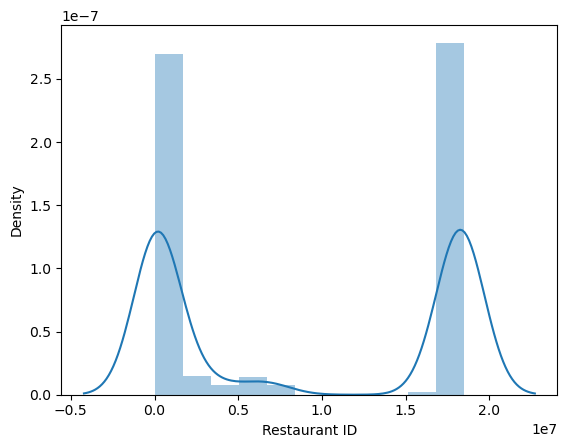

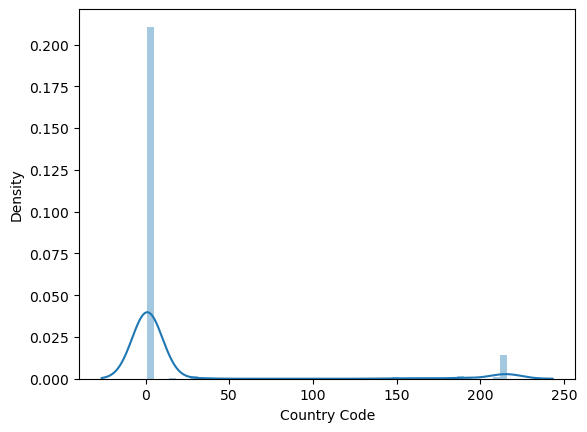

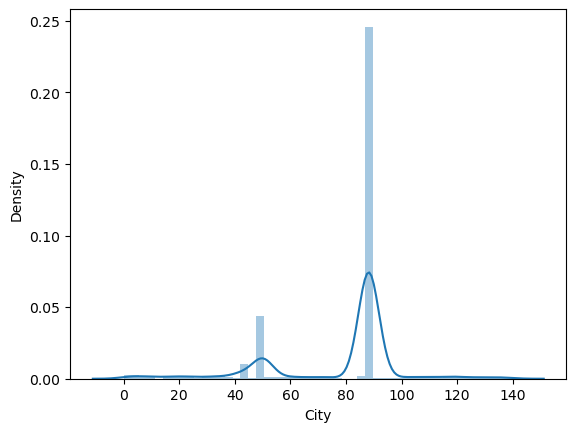

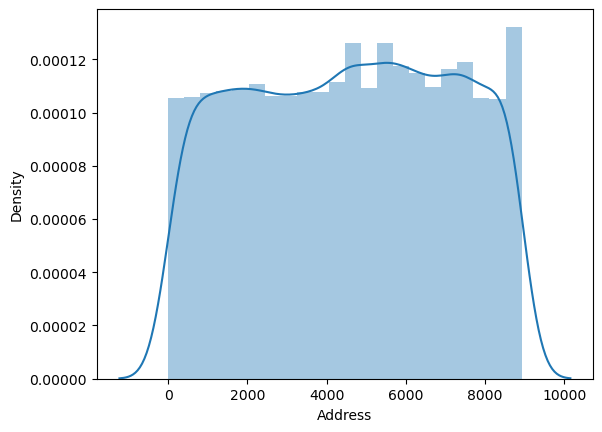

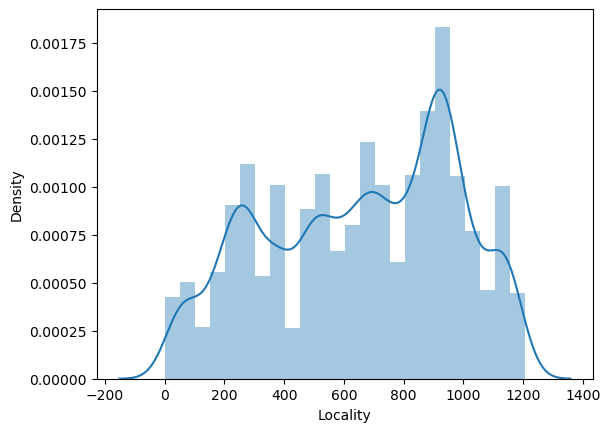

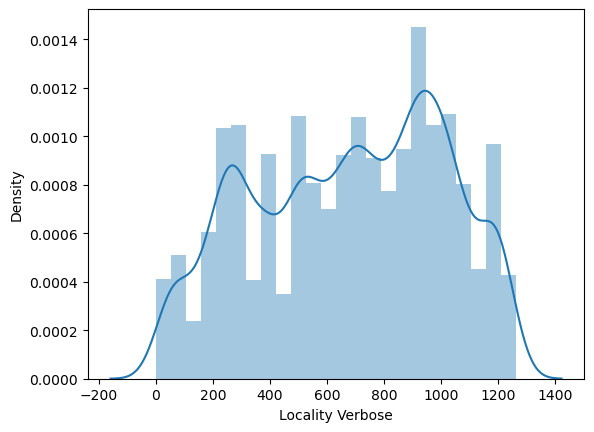

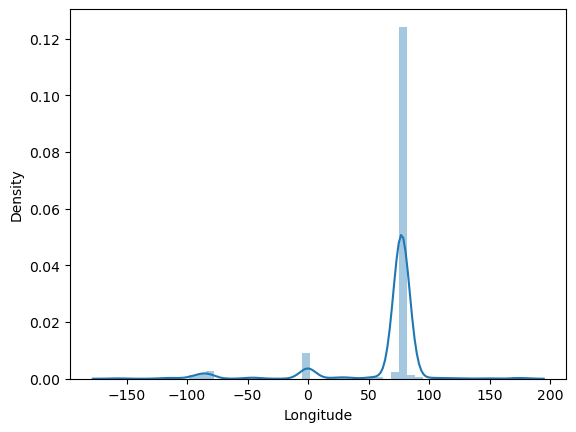

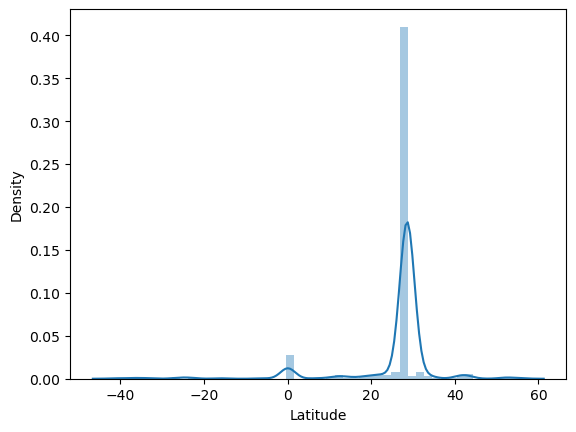

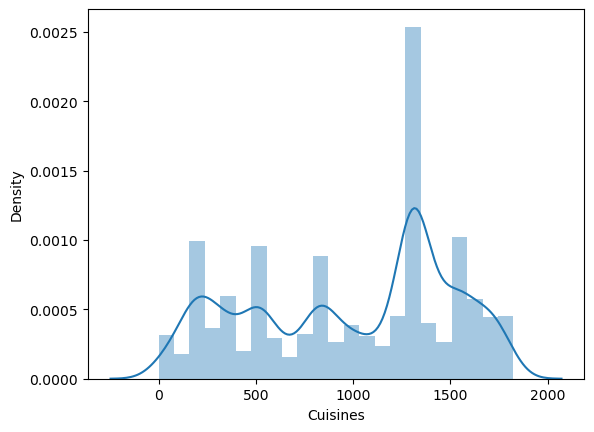

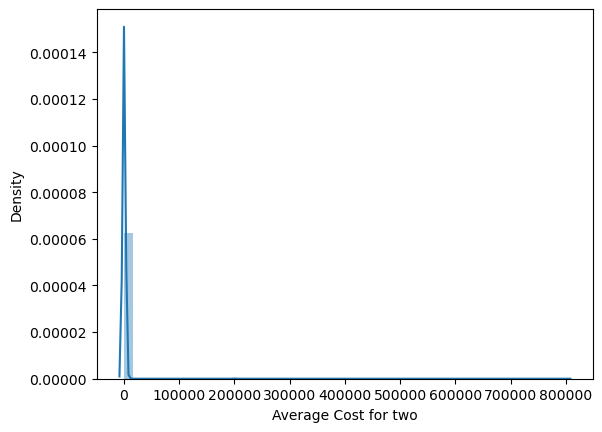

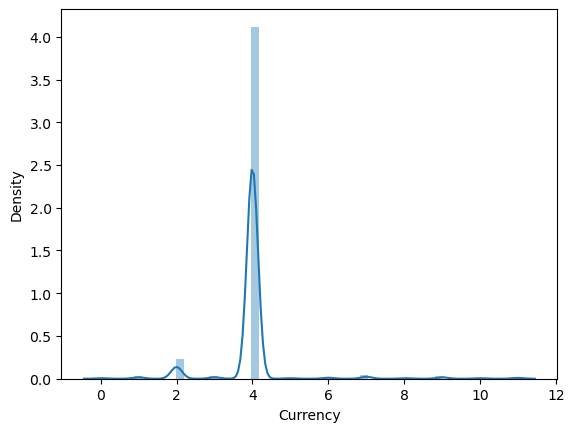

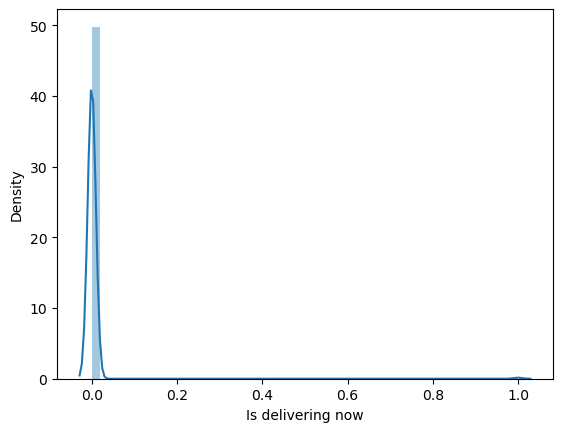

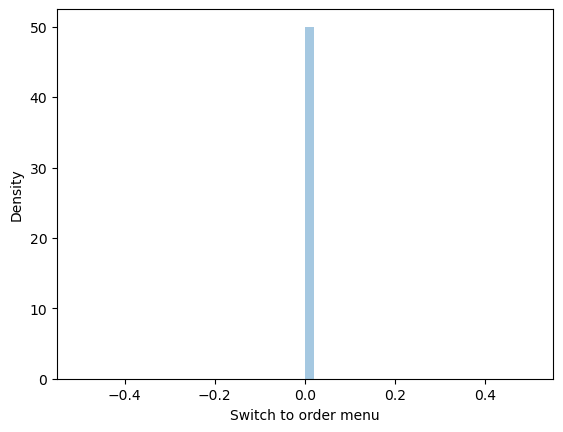

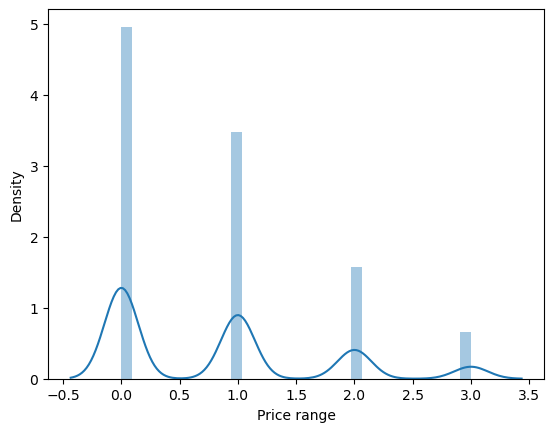

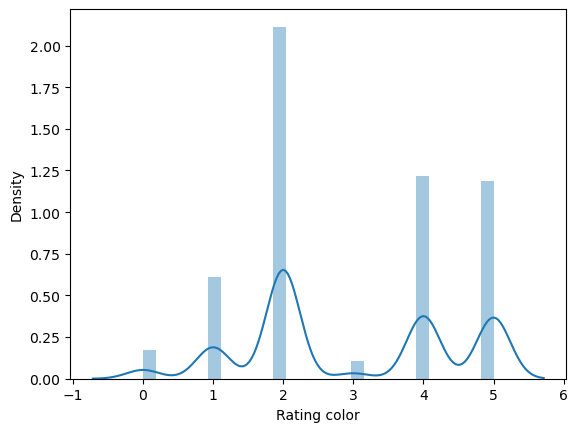

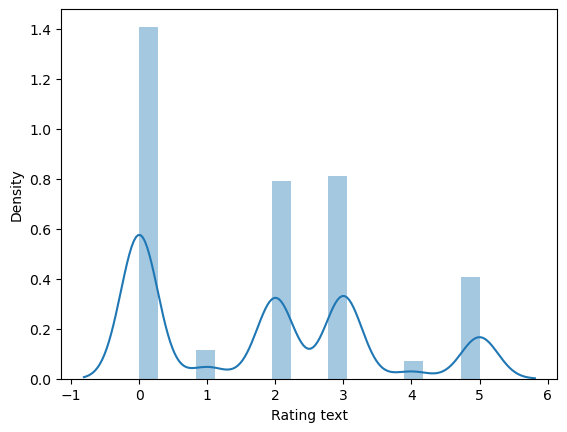

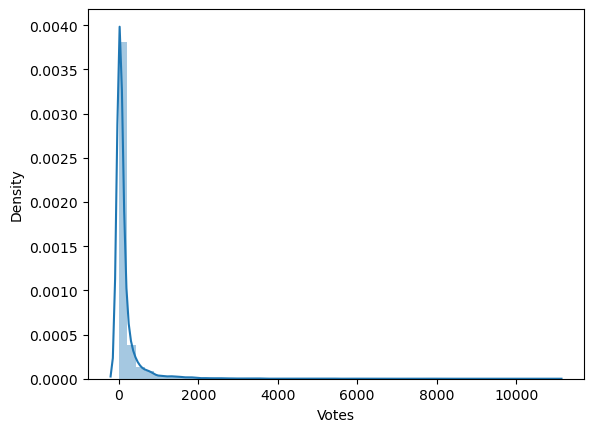

In [73]:
for i in df2.columns: # Skewness
    plt.figure()
    sns.distplot(df2[i])

In [74]:
df2.skew()

Restaurant ID            0.061570
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  2.858093
dtype: float64

In [77]:
df2.plot(kind='box',subplots=True,layout=(3,7),figsize=(10,10))

Restaurant ID              Axes(0.125,0.653529;0.0945122x0.226471)
Country Code            Axes(0.238415,0.653529;0.0945122x0.226471)
City                    Axes(0.351829,0.653529;0.0945122x0.226471)
Address                 Axes(0.465244,0.653529;0.0945122x0.226471)
Locality                Axes(0.578659,0.653529;0.0945122x0.226471)
Locality Verbose        Axes(0.692073,0.653529;0.0945122x0.226471)
Longitude               Axes(0.805488,0.653529;0.0945122x0.226471)
Latitude                   Axes(0.125,0.381765;0.0945122x0.226471)
Cuisines                Axes(0.238415,0.381765;0.0945122x0.226471)
Average Cost for two    Axes(0.351829,0.381765;0.0945122x0.226471)
Currency                Axes(0.465244,0.381765;0.0945122x0.226471)
Has Table booking       Axes(0.578659,0.381765;0.0945122x0.226471)
Has Online delivery     Axes(0.692073,0.381765;0.0945122x0.226471)
Is delivering now       Axes(0.805488,0.381765;0.0945122x0.226471)
Switch to order menu           Axes(0.125,0.11;0.0945122x0.226

### Skewness is observed in Average cost for 2, Votes - No Skewness and outliars will be removed for Object categories

In [79]:
from scipy.stats import zscore
for i in num_col:
    col = df2[i]
    z=zscore(col)
    thresh =3
    df3 = df2[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df2.shape[0]-df3.shape[0])/df2.shape[0])*100)


Data loss rate 1.8113286566851639


## 3. Co Relation and Multicolinearity

In [87]:
corr_hmap=df3.corr()
plt.figure(figsize=(20,25))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- Near to Zero : No Corelation- Low Corelation Worst - very Low co-relation is observed.

In [88]:
sns.pairplot(df3)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df3.drop(['Average Cost for two'], axis=1)
y = df3['Average Cost for two']
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

     VIF Factor              features
0      2.552877         Restaurant ID
1      3.049355          Country Code
2     10.785443                  City
3      4.435721               Address
4   5054.315985              Locality
5   4892.858481      Locality Verbose
6      8.665111             Longitude
7      6.563330              Latitude
8      4.631678              Cuisines
9           inf              Currency
10     1.671366     Has Table booking
11     1.566831   Has Online delivery
12     1.018620     Is delivering now
13          NaN  Switch to order menu
14     3.390424           Price range
15     6.631005      Aggregate rating
16     5.651334          Rating color
17     2.996319           Rating text
18     2.080431                 Votes
19          inf               Country


In [91]:
df3.nunique().to_frame("No of unique values")

No of unique values
Restaurant ID                        9378
Country Code                           15
City                                  141
Address                              8755
Locality                             1173
Locality Verbose                     1230
Longitude                            7978
Latitude                             8516
Cuisines                             1770
Average Cost for two                  138
Currency                               12
Has Table booking                       2
Has Online delivery                     2
Is delivering now                       2
Switch to order menu                    1
Price range                             4
Aggregate rating                       33
Rating color                            6
Rating text                             6
Votes                                 848
Country                                12

### Considering above information - Columns - Restaurant ID	, Switch to order menu, Country, Currency, Locality, Longitude, Latitude, Address	to be dropped

In [95]:
# Drop unnecessary columns
df3 = df3.drop(['Address', 'Currency', 'Restaurant ID', 'Country','Switch to order menu','Longitude','Latitude','Locality'], axis=1)    

# MODEL

## 1. Feature Scaling using Standard Scalarization¶

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Restaurant ID  Country Code      City   Address  Locality  \
0         -0.322481      2.542778 -0.232884  1.609077 -1.556065   
1         -0.323999      2.542778 -0.232884  0.583997 -0.216563   
2         -0.324486      2.542778 -0.146355  0.049631 -1.121203   
3         -0.322382      2.542778 -0.146355  1.611026  0.637291   
4         -0.322860      2.542778 -0.146355  1.610636  0.637291   
...             ...           ...       ...       ...       ...   
9373      -0.368186      3.356322  2.665834  0.533718 -0.457800   
9374      -0.368980      3.356322  2.665834  0.547749 -0.346704   
9375      -0.368178      3.356322  2.665834  0.549308 -0.340355   
9376      -0.368143      3.356322  2.665834  0.549698 -0.340355   
9377      -0.366859      3.356322  2.665834 -0.116409  0.027849   

      Locality Verbose  Longitude  Latitude  Cuisines  Currency  \
0            -1.536597   1.376026 -1.023575 -0.135078 -4.332443   
1            -0.240329   1.375701 -1.024637  0.236223 -4.332443   
2            -1.107529   1.376734 -1.022132  1.324855 -4.332443   
3             0.587590   1.376726 -1.021778  0.265383 -4.332443   
4             0.587590   1.376751 -1.021857  0.257607 -4.332443   
...                ...        ...       ...       ...       ...   
9373         -0.476014  -0.850218  1.368940  1.600901  7.640825   
9374         -0.370258  -0.848672  1.367769  1.622285  7.640825   
9375         -0.361193  -0.848833  1.371926  0.234279  7.640825   
9376         -0.361193  -0.848800  1.372122  1.297639  7.640825   
9377          0.001399  -0.849042  1.365502 -1.280086  7.640825   

      Has Table booking  Has Online delivery  Is delivering now  \
0              2.748921            -0.585477          -0.060322   
1              2.748921            -0.585477          -0.060322   
2              2.748921            -0.585477          -0.060322   
3             -0.363779            -0.585477          -0.060322   
4              2.748921            -0.585477          -0.060322   
...                 ...                  ...                ...   
9373          -0.363779            -0.585477          -0.060322   
9374          -0.363779            -0.585477          -0.060322   
9375          -0.363779            -0.585477          -0.060322   
9376          -0.363779            -0.585477          -0.060322   
9377          -0.363779            -0.585477          -0.060322   

      Switch to order menu  Price range  Aggregate rating  Rating color  \
0                      0.0     1.356575          1.427830     -2.018843   
1                      0.0     1.356575          1.229730     -2.018843   
2                      0.0     2.472831          1.163697     -1.340883   
3                      0.0     2.472831          1.493864     -2.018843   
4                      0.0     2.472831          1.427830     -2.018843   
...                    ...          ...               ...           ...   
9373                   0.0     1.356575          0.965596     -1.340883   
9374                   0.0     1.356575          1.031630     -1.340883   
9375                   0.0     2.472831          0.701463      1.370957   
9376                   0.0     2.472831          0.899563     -1.340883   
9377                   0.0     0.240320          0.899563     -1.340883   

      Rating text     Votes   Country  
0       -0.453092  0.970942 -4.332443  
1       -0.453092  2.309495 -4.332443  
2        1.928691  0.758319 -4.332443  
3       -0.453092  1.217390 -4.332443  
4       -0.453092  0.560194 -4.332443  
...           ...       ...       ...  
9373     1.928691  3.261463  7.640825  
9374     1.928691  4.450215  7.640825  
9375     0.142353  2.647758  7.640825  
9376     1.928691  3.807516  7.640825  
9377     1.928691  2.309495  7.640825  

[9378 rows x 20 columns]

## 2. Best random state value:

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.051377302536665614  at random state  75


## 3. Creating train test split

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

## 4. Classification Algorithms and Cross Validation Score

R2_score:   LinearRegression()  is  0.051377302536665614
R2_score_Training Data:   LinearRegression()  is  2.399820789253515
error:
Mean Absolute error 1458.7993364763138
Mean Squared error 102470123.10040344
Root Mean Squared error 10122.752743221748


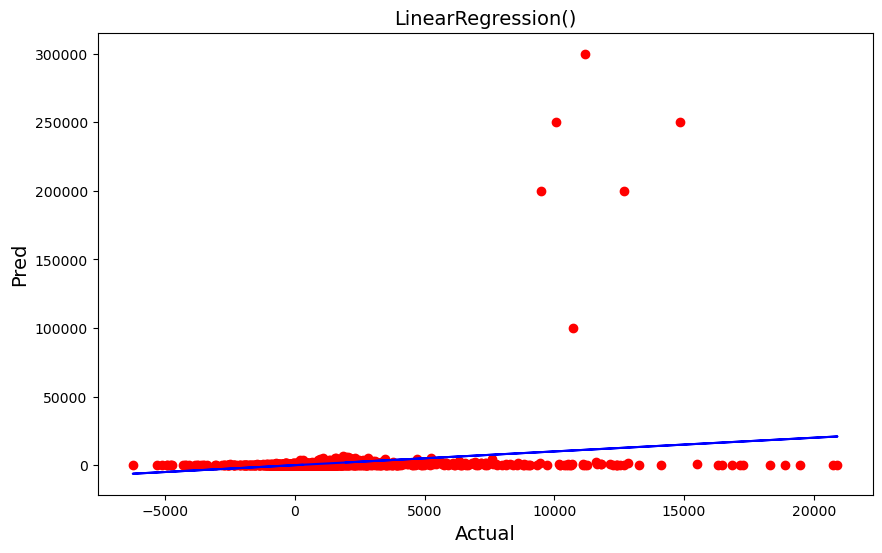

Cross Validation of:   LinearRegression()  is 
[-2.17189786e+03 -1.00165684e+01 -1.77737589e+00 -5.56856642e-01
 -4.83196239e-03]
-436.85069836088695
Diff in Acc Score and Cross Val Score is -  43690.20756634236


R2_score:   RandomForestRegressor()  is  0.35412114309268816
R2_score_Training Data:   RandomForestRegressor()  is  93.90851922694834
error:
Mean Absolute error 466.8624697938877
Mean Squared error 69767765.57446663
Root Mean Squared error 8352.710073650745


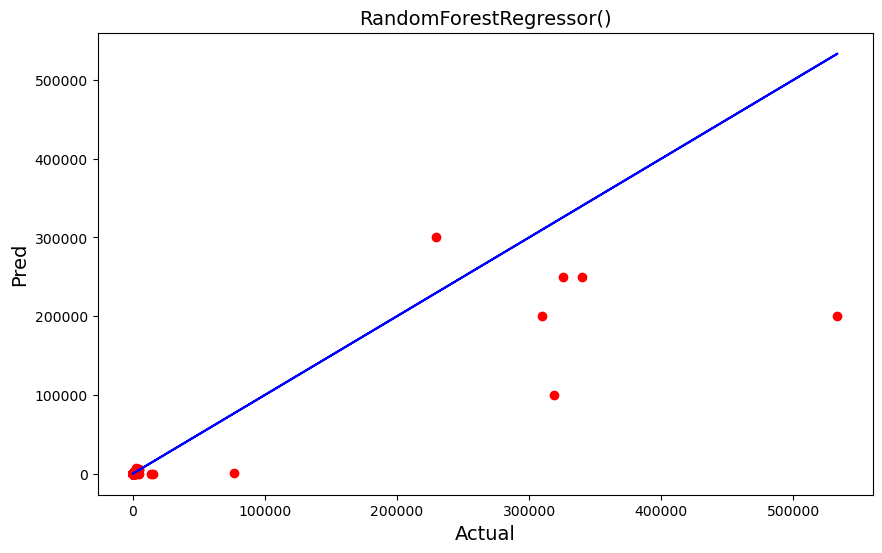

Cross Validation of:   RandomForestRegressor()  is 
[-5.27521899e+03  8.46285687e-01  8.36052931e-01  8.43587524e-01
 -4.65803091e-03]
-1054.5395437279196
Diff in Acc Score and Cross Val Score is -  105489.36648710123


R2_score:   DecisionTreeRegressor()  is  0.3818154016403894
R2_score_Training Data:   DecisionTreeRegressor()  is  100.0
error:
Mean Absolute error 463.8731343283582
Mean Squared error 66776234.70540156
Root Mean Squared error 8171.672699356085


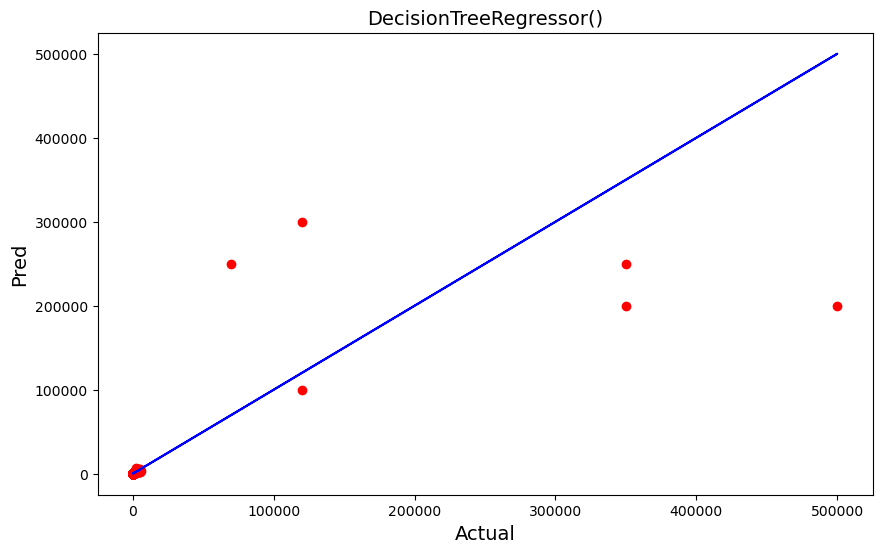

Cross Validation of:   DecisionTreeRegressor()  is 
[-2.03197175e+04  7.45295293e-01  7.67593310e-01  7.71732269e-01
 -2.30413839e-03]
-4063.48703880838
Diff in Acc Score and Cross Val Score is -  406386.88542100205


R2_score:   KNeighborsRegressor()  is  0.539935575517812
R2_score_Training Data:   KNeighborsRegressor()  is  70.27433935655331
error:
Mean Absolute error 433.8707178393746
Mean Squared error 49696110.30483297
Root Mean Squared error 7049.546815564315


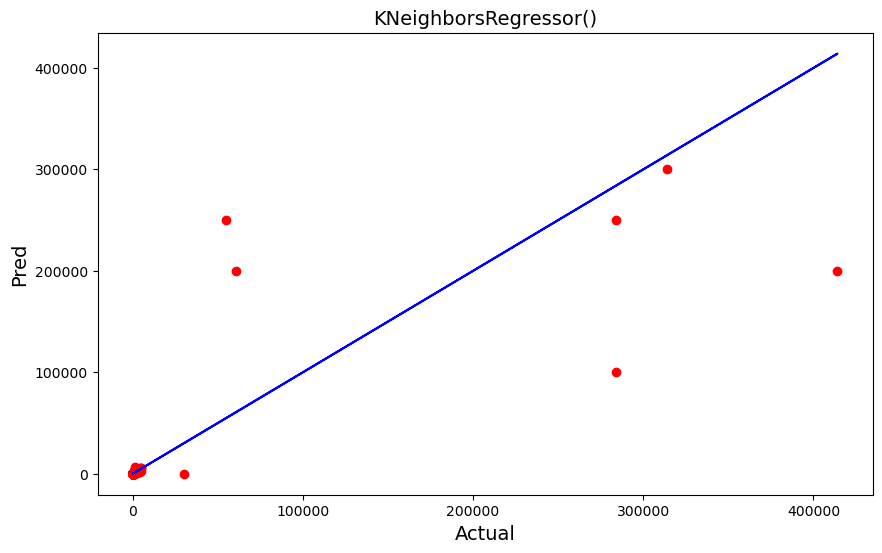

Cross Validation of:   KNeighborsRegressor()  is 
[-1.04554443e+02  7.24441556e-01  7.39474026e-01  7.00755485e-01
 -3.95970926e-03]
-20.478746387123337
Diff in Acc Score and Cross Val Score is -  2101.868196264115


R2_score:   Lasso()  is  0.05186270007391247
R2_score_Training Data:   Lasso()  is  2.3967701517557782
error:
Mean Absolute error 1448.9087955975335
Mean Squared error 102417690.50994644
Root Mean Squared error 10120.162573296262


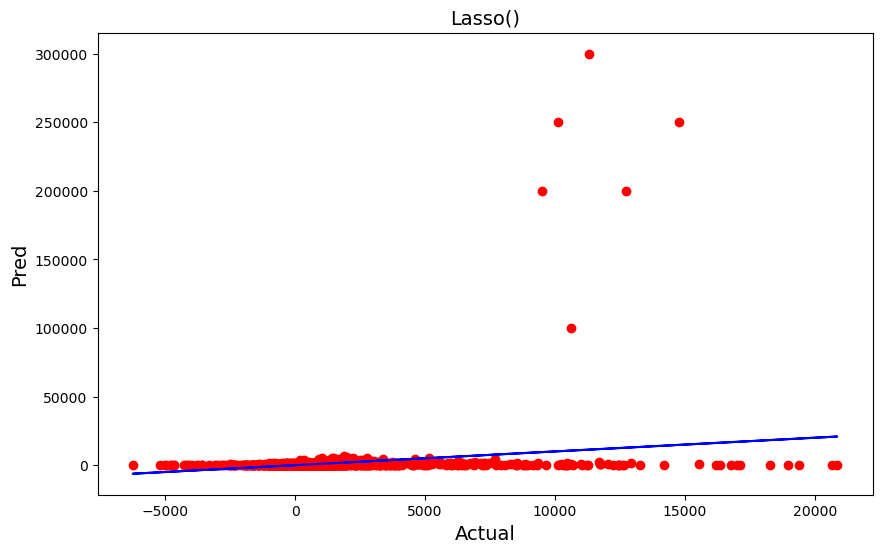

Cross Validation of:   Lasso()  is 
[-2.15636352e+03 -9.94177355e+00 -1.73295121e+00 -5.48977980e-01
 -4.76464961e-03]
-433.7183970306317
Diff in Acc Score and Cross Val Score is -  43377.02597307056


R2_score:   Ridge()  is  0.05153859262454197
R2_score_Training Data:   Ridge()  is  2.399504659639462
error:
Mean Absolute error 1455.3208492657357
Mean Squared error 102452700.56222914
Root Mean Squared error 10121.89214338056


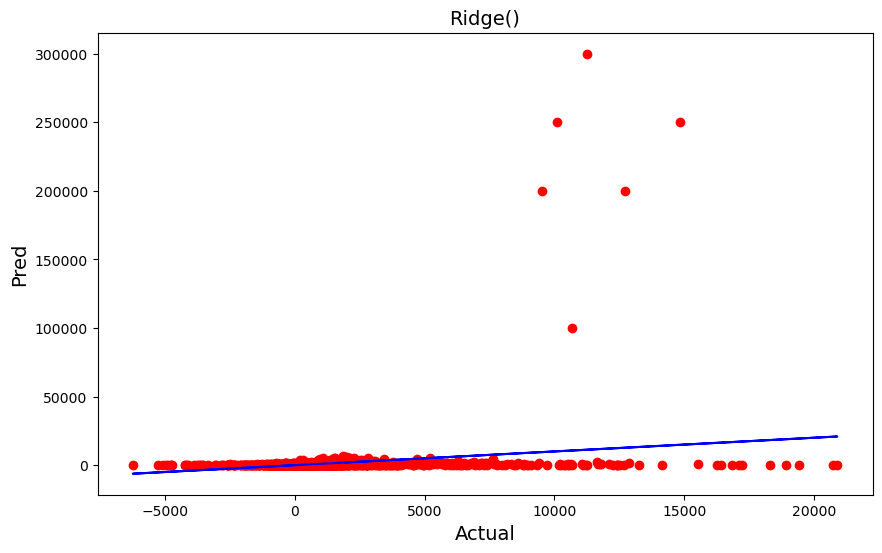

Cross Validation of:   Ridge()  is 
[-2.15614496e+03 -1.00668963e+01 -1.77068315e+00 -5.56235012e-01
 -4.83486306e-03]
-433.708722241587
Diff in Acc Score and Cross Val Score is -  43376.02608342115


R2_score:   SVR()  is  -0.001552941653212292
R2_score_Training Data:   SVR()  is  -0.0802489920142202
error:
Mean Absolute error 718.1730321588313
Mean Squared error 108187642.46018118
Root Mean Squared error 10401.328879531748


Cross Validation of:   SVR()  is 
[ 0.1557757   0.16215802  0.29665371  0.15622603 -0.0056844 ]
0.1530258110125165
Diff in Acc Score and Cross Val Score is -  -15.457875266572879


R2_score:   ExtraTreesRegressor()  is  0.3502794063877688
R2_score_Training Data:   ExtraTreesRegressor()  is  99.99999980206664
error:
Mean Absolute error 394.8509026297087
Mean Squared error 70182749.56559937
Root Mean Squared error 8377.514521956937


Cross Validation of:   ExtraTreesRegressor()  is 
[-2.87722470e+03 -3.21068777e+00  8.38766673e-01  8.40686253e-01
 -4.01431452e-03]
-575.7519896729201
Diff in Acc Score and Cross Val Score is -  57610.22690793079




In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
#from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import GaussianNB


lr= LinearRegression()
rfc=RandomForestRegressor()
dtr=DecisionTreeRegressor()
kn=KNN()
ls=Lasso()
rd=Ridge()
svr=SVR()
etr=ExtraTreesRegressor()




model=[lr,rfc,dtr,kn,ls,rd,svr,etr]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    pred_train=m.predict(x_train)
    
    print("R2_score:  ",m," is " ,r2_score(y_test,predm))
    print("R2_score_Training Data:  ",m," is " ,r2_score(y_train,pred_train)*100)
    print("error:")
    
    print("Mean Absolute error",mean_absolute_error(y_test,predm))
    print("Mean Squared error",mean_squared_error(y_test,predm))
    print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,predm)))
   
    plt.figure(figsize=(10,6))
    plt.scatter(x=predm,y=y_test,color="r")
    plt.plot(predm,predm,color="b")
    plt.xlabel("Actual",fontsize=14)
    plt.ylabel("Pred",fontsize=14)
    plt.title(m,fontsize=14)
    plt.show()
    score = cross_val_score(m,x,y)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",(r2_score(y_test,predm)-score.mean())*100)
    print("\n")

# KNN Model is most suited model

## 5. Hyper Parameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': np.arange(1, 11),  # Different values of K
    'weights': ['uniform', 'distance'],  # Different weight options
    'metric': ['euclidean', 'manhattan'],  # Different distance metrics
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Instantiate GridSearchCV without "precomputed" kernel
GCV = GridSearchCV(KNN(),parameters, cv=5)
GCV.fit(x_train, y_train)
print(GCV.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [108]:
Final_model = KNN(metric="euclidean" , n_neighbors= 5 , weights= 'uniform', algorithm ='auto' , p= 1 )
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

print("R2_score:",r2_score(y_test,pred))

print("Mean Absolute error",mean_absolute_error(y_test,pred))
print("Mean Squared error",mean_squared_error(y_test,pred))
print("Root Mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

53.9935575517812
R2_score: 0.539935575517812
Mean Absolute error 433.8707178393746
Mean Squared error 49696110.30483297
Root Mean Squared error 7049.546815564315


# Saving the Model

In [110]:
import joblib # save as *.pkl
joblib.dump(Final_model,"zomato_p1.pkl")

['zomato_p1.pkl']

# Project 2 : Price Range

In [112]:
x = df3.drop(['Price range'], axis=1)
y = df3['Price range']

0       2
1       2
2       3
3       3
4       3
       ..
9546    2
9547    2
9548    3
9549    3
9550    1
Name: Price range, Length: 9378, dtype: int64

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor              features
0     1.511732          Country Code
1     8.903784                  City
2     4.715281      Locality Verbose
3     4.123326              Cuisines
4     1.014610  Average Cost for two
5     1.253149     Has Table booking
6     1.533680   Has Online delivery
7     1.016007     Is delivering now
8     4.998658      Aggregate rating
9     5.105415          Rating color
10    2.610011           Rating text
11    1.988823                 Votes


### Scalarization

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

### OverSampling

In [116]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

### Best random state value

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.9847887323943662  at random state  148


### Creating train test split

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

### Classification Algorithms and Cross Validation Score

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.983849765258216
[[1326    3    0    0]
 [  14 1327   17    2]
 [   0   10 1274   29]
 [   0    0   11 1312]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1329
           1       0.99      0.98      0.98      1360
           2       0.98      0.97      0.97      1313
           3       0.98      0.99      0.98      1323

    accuracy                           0.98      5325
   macro avg       0.98      0.98      0.98      5325
weighted avg       0.98      0.98      0.98      5325



Cross Validation of:   RandomForestClassifier()  is 
[0.83633803 0.97971831 0.98816901 0.96816005 0.98112144]
0.9507013679711405
Diff in Acc Score and Cross Val Score is -  0.033148397287075526


Accuracy Score of:   ExtraTreesClassifier()  is 
0.9740845070422535
[[1292   29    8    0]
 [   8 1308   40    4]
 [   1   16 1279   17]
 [   1    0   14 1308]]
              precision    recall  f1-score 

KeyboardInterrupt: 

####  Best Model is : RandomForestClassifier

### Hyper Parameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [122]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [123]:
RFC_final = RandomForestClassifier(
  bootstrap =  False,
  max_depth = 30,
  min_samples_leaf = 1,
  min_samples_split =  2,
  n_estimators =  100,
  random_state=maxRS )
RFC_final.fit(x_train,y_train)
pred=RFC_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.87323943661971


 ## Saving the Model

In [124]:
import joblib # save as *.pkl
joblib.dump(RFC_final,"Zomato_p2.pkl")

['Zomato_p2.pkl']